## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [5]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [6]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train = fetch_20newsgroups(subset='train')

mydata_test = fetch_20newsgroups(subset='test')



In [7]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [8]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils.Bunch'>
<class 'sklearn.utils.Bunch'>


In [9]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output: 
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [10]:
text = mydata_train.data
test = mydata_test.data

print(text[1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



## Preprocessing the Corpus

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

#added by me
import string

def clean_text_to_string(text_toclean):
## reused from A1

    '''
    Input:
        text: a string containing a news piece.
    Output:
        text_clean: a processed newss piece. 

    '''
    # Tokenize sentence
    text_tokenized = []
    text_tokenized = word_tokenize(text_toclean)
    
    # all_lower
    text_tk_lower = []
    for w in text_tokenized:
        this_word = w
        text_tk_lower.append(this_word.lower())
        

    # Scan & remove stopwords, punct, make into stem
    
    text_trimmed = []
    all_punctuation = string.punctuation
    stemmer = PorterStemmer()

    for w in text_tk_lower:
        if w not in stopwords.words('english'):
            if w not in all_punctuation:
                if w.isalpha():
                    text_trimmed.append(w)
                
    text_cleaned = text_trimmed
    text_joined_cleaned = " ".join(text_cleaned)
    
    return text_joined_cleaned

def clean_text_to_list(text_toclean_list):
    ## reused from A1

    '''
    Input:
        text: a string containing a news piece.
    Output:
        text_clean: a processed newss piece. 

    '''
    # Tokenize sentence
    text_tokenized = []
    text_tokenized = word_tokenize(text_toclean_list)
    
    # all_lower
    text_tk_lower = []
    for w in text_tokenized:
        this_word = w
        text_tk_lower.append(this_word.lower())
        

    # Scan & remove stopwords, punct, make into stem
    
    text_trimmed = []
    all_punctuation = string.punctuation
    stemmer = PorterStemmer()

    for w in text_tk_lower:
        if w not in stopwords.words('english'):
            if w not in all_punctuation:
                if w.isalpha():
                    text_trimmed.append(w)
                
    return text_trimmed

In [18]:
# Preprocessing the data 

lines = [] # this is the representation of each article 

word_list = []
count_cutoff = 0 
for line in text:
    tokenized = clean_text_to_list(line)
    for chunk in tokenized:
        # Make sure the word_list contains unique tokens
        if chunk not in word_list:
            word_list.append(chunk)
    clean_string = clean_text_to_string(line)
    lines.append(clean_string)
    
    


In [19]:
# print(word_list)

# Calculate the total documents present in the corpus
total_docs = len(lines)
 
# Create a dictionary to keep track of index of each word 


dict_idx = {}

for i in range(len(word_list)):
    dict_idx[word_list[i]] = i
    i = i + 1

print(dict_idx)
    


{'lerxst': 0, 'thing': 1, 'subject': 2, 'car': 3, 'organization': 4, 'university': 5, 'maryland': 6, 'college': 7, 'park': 8, 'lines': 9, 'wondering': 10, 'anyone': 11, 'could': 12, 'enlighten': 13, 'saw': 14, 'day': 15, 'sports': 16, 'looked': 17, 'late': 18, 'early': 19, 'called': 20, 'bricklin': 21, 'doors': 22, 'really': 23, 'small': 24, 'addition': 25, 'front': 26, 'bumper': 27, 'separate': 28, 'rest': 29, 'body': 30, 'know': 31, 'tellme': 32, 'model': 33, 'name': 34, 'engine': 35, 'specs': 36, 'years': 37, 'production': 38, 'made': 39, 'history': 40, 'whatever': 41, 'info': 42, 'funky': 43, 'looking': 44, 'please': 45, 'thanks': 46, 'il': 47, 'brought': 48, 'neighborhood': 49, 'guykuo': 50, 'guy': 51, 'kuo': 52, 'si': 53, 'clock': 54, 'poll': 55, 'final': 56, 'call': 57, 'summary': 58, 'reports': 59, 'keywords': 60, 'acceleration': 61, 'upgrade': 62, 'washington': 63, 'fair': 64, 'number': 65, 'brave': 66, 'souls': 67, 'upgraded': 68, 'oscillator': 69, 'shared': 70, 'experiences'

In [20]:
# Create a frequency dictionary
import operator

def frequency_dict(given_lines):
    tokenized = [] 
    running_count = 0
    freq_word = dict.fromkeys(word_list, 0)
    # iterate through all docs one word at a time and update values in dict
    for news_article in given_lines:
        #tokenize this news article (already cleaned)
        tokenized = word_tokenize(news_article)
        for word in word_list:
            #get count from last article scan
            running_count = freq_word[word]
            # update num of occurences found scanning this doc
            running_count = running_count + operator.countOf(tokenized, word)
            # store updated count of word occurrence 
            freq_word[word] = running_count

            

            
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    
    return freq_word

In [25]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)



In [77]:
print(freq_word)

{'lerxst': 4, 'thing': 1521, 'subject': 12254, 'car': 1270, 'organization': 11195, 'university': 5552, 'maryland': 125, 'college': 620, 'park': 215, 'lines': 11826, 'wondering': 304, 'anyone': 2462, 'could': 3868, 'enlighten': 27, 'saw': 548, 'day': 1328, 'sports': 161, 'looked': 343, 'late': 288, 'early': 462, 'called': 1065, 'bricklin': 4, 'doors': 87, 'really': 2165, 'small': 783, 'addition': 289, 'front': 453, 'bumper': 33, 'separate': 217, 'rest': 483, 'body': 513, 'know': 5114, 'tellme': 2, 'model': 441, 'name': 1237, 'engine': 367, 'specs': 128, 'years': 1910, 'production': 126, 'made': 1582, 'history': 609, 'whatever': 477, 'info': 944, 'funky': 7, 'looking': 998, 'please': 2194, 'thanks': 1850, 'il': 148, 'brought': 297, 'neighborhood': 36, 'guykuo': 15, 'guy': 510, 'kuo': 23, 'si': 123, 'clock': 277, 'poll': 41, 'final': 379, 'call': 1070, 'summary': 596, 'reports': 289, 'keywords': 966, 'acceleration': 52, 'upgrade': 211, 'washington': 538, 'fair': 217, 'number': 1703, 'brav

In [30]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    tokenized_article = []
    tf = 1.00
    times_in_single_article = 0
    length_article = 0
    tokenized_article = word_tokenize(document)
    length_article = len(tokenized_article)
    times_in_single_article = operator.countOf(tokenized_article, word)
    tf = times_in_single_article / length_article
    
    '''
    document: list containing the entire corpus 
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    
    return tf

In [31]:
# Create a function to calculate the Inverse Document Frequency
import math 

def inverse_df(word):
    frequency = 1
    if word in freq_word:
        frequency = freq_word[word] + 1
    idf = math.log(total_docs / frequency)
    
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    
    return idf

In [51]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence, dict_idx):
    words = word_tokenize(sentence)
    tf_idf_vec = [ ]
    local_tf = 0
    local_idf = 0
    for word in words:
        this_vec = [word]
        this_vec.append(inverse_df(word))
        freq = operator.countOf(words, word)
        this_vec.append(freq / len(sentence))
        tf_idf_vec.append(this_vec)
        this_vec = []

    '''
    sentence: list containing the entire corpus 
    ### this is actually a list of many sentences and labeling it this way is confusing :) 
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
        
    return tf_idf_vec

In [70]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

result_tfidf = []
for line in lines:
    result_tfidf.append(tfidf(line, dict_idx))


In [80]:
array_result_tfidf = np.matrix(result_tfidf)

[[list([['lerxst', 7.724358263469001, 0.005263157894736842], ['thing', 2.00601563748147, 0.002631578947368421], ['subject', -0.07989312005911198, 0.002631578947368421], ['car', 2.186236904713647, 0.013157894736842105], ['organization', 0.010484325267756903, 0.002631578947368421], ['university', 0.7117025746614937, 0.002631578947368421], ['maryland', 4.497514268951623, 0.002631578947368421], ['college', 2.902465093969622, 0.002631578947368421], ['park', 3.958517768218936, 0.002631578947368421], ['lines', -0.04434415634801584, 0.002631578947368421], ['wondering', 3.613484399295689, 0.002631578947368421], ['anyone', 1.5246607777825631, 0.005263157894736842], ['could', 1.073044821202588, 0.002631578947368421], ['enlighten', 6.001591665727897, 0.002631578947368421], ['car', 2.186236904713647, 0.013157894736842105], ['saw', 3.0256977343935705, 0.002631578947368421], ['day', 2.1416141171898557, 0.002631578947368421], ['sports', 4.246199840670717, 0.002631578947368421], ['car', 2.1862369047136

## Multinomial Naive Bayes (10 Points)

In [ ]:
#Fit a Multinomial Naive Bayes Model on our dataset
model = MultinomialNB()
model.fit(array_result_tfidf, mydata_train.target_names)


In [ ]:
#Perform testing on the train dataset

pred = 

In [ ]:
#Calculate the F1 Score and the Accuracy

F1_score = 
Accuracy = 
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [ ]:
# install libraries
# pip install wikipedia

In [ ]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''
topics_articles = []

# selected topics
topics = ["Entertainment", "Geography", "Economy"]

for topic in topics:
    topics_articles.extend(wikipedia.search(topic, 10))
# list of articles to be downloaded
# articles = ["Jennifer Coolidge", "RuPaul", "Chess", "Uganda", "Syrian Arab Republic", "France", "Hyperinflation", "American Express", "Jerome Powell"]
# download and store articles (summaries) in this variable

data = []

for article in topics_articles:
    try: 
        data.append(wikipedia.summary(article))
    except:
        continue
    
print(data)


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 

I am going to see how the data looks without cleaning because I want to see if the presence of more words (which is more data) is helpful for this exercise or not. 

In [ ]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')

def clean_message(message):
    return message



### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [ ]:
from sklearn.feature_extraction.text import *

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data)


In [ ]:
print(X.shape)

### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [ ]:
 from sklearn.manifold import TSNE

# call TSNE() to fit the data
embedded_data = TSNE(n_components=2, perplexity = 5, learning_rate='auto', init='random').fit_transform(X)

print(embedded_data)

Plot and annotate the points with different markers for different expected groups.

In [ ]:
import matplotlib.pyplot as plt


# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))

x = embedded_data[:,0]
y = embedded_data[:,1]

red = ax.scatter(x[:9], y[:9], c = "red")
for i in range(9):
    plt.annotate("ENT", (x[i], y[i]))
    
cyan = ax.scatter(x[9:18], y[9:18], c = "cyan")
for i in range(9, 18):
    plt.annotate("GEO", (x[i], y[i]))
    
yellow = ax.scatter(x[18:27], y[18:27], c = "yellow")
for i in range(18, 27):
    plt.annotate("ECON", (x[i], y[i]))


**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  
I think the categorization did pretty well, there are only one or two outliers that were misclassified in each category. This may be because there was unintentional overlap in the summaries of different articles. This was probably also compounded by my decision not to remove stop words. This means that some of the summaries might have been classified close together because they had a lot of similar non-meaningful words. 


# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc.., 

### We are providing train.txt and val.txt files along with this notebook. 

### Library Imports and Utility functions

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import scipy as sp
import string
import pandas as pd
import re
import numpy as np
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robertzipp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/robertzipp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/robertzipp/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/robertzipp/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [1]:
# Import the train.txt and val.txt file into pandas dataframe format 

train = pd.read_table('train.txt', delimiter = ';', header = None)

val = pd.read_table('val.txt', delimiter = ';', header = None)

print(train.shape)
print(val.shape)

# train 

# validation

# and printout the train.shape and validation.shape 

# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

NameError: name 'pd' is not defined

In [4]:
# clean the text in the train and validation dataframes using the clean_text function provided above

train_clean = train
for i in range(len(train_clean)):
    train_clean.iloc[i][0] = clean_text(train_clean.iloc[i][0])

val_clean = val
for i in range(len(val_clean)):
    val_clean.iloc[i][0] = clean_text(val_clean.iloc[i][0])

In [94]:
# initialise count vectorizer from sklearn module with default parameter

# fit on train dataset and transform both train and validation dataset

vectorizer = CountVectorizer()
vectorizer.fit(train_clean[0])
X_count_train = vectorizer.transform(train_clean[0].tolist())
X_count_train = X_count_train.toarray()

X_count_val = vectorizer.transform(val_clean[0].tolist())
X_count_val = X_count_val.toarray()

In [108]:
# initialise tfidf vectorizer from sklearn module with default parameter

# fit on train dataset and transform both train and validation dataset

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(train_clean[0])

X_tfidf_train = tfidf_vectorizer.transform(train_clean[0])
X_tfidf_train = X_tfidf_train.toarray()

X_tfidf_val = tfidf_vectorizer.transform(val_clean[0])
X_tfidf_val = X_tfidf_val.toarray()

In [109]:
print(X_tfidf_val)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [76]:
print(train.shape)

(16000, 2)


In [30]:
# initialise label encoder from sklearn module

from sklearn import preprocessing
le = preprocessing.LabelEncoder()


# fit on train labels and transform both train and validation labels
le.fit(train[1])
train[1] = le.transform(train[1])
val[1] = le.transform(val[1])


In [31]:
# convert the labels into one hot encoding form
from sklearn.preprocessing import OneHotEncoder



enc = OneHotEncoder(handle_unknown='ignore')
onehot_train = pd.get_dummies(train[1])
onehot_val = pd.get_dummies(val[1])

print(onehot_train)

       0  1  2  3  4  5
0      0  0  0  0  1  0
1      0  0  0  0  1  0
2      1  0  0  0  0  0
3      0  0  0  1  0  0
4      1  0  0  0  0  0
...   .. .. .. .. .. ..
15995  0  0  0  0  1  0
15996  0  0  0  0  1  0
15997  0  0  1  0  0  0
15998  1  0  0  0  0  0
15999  0  0  0  0  1  0

[16000 rows x 6 columns]


### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [69]:
import tensorflow as tf
import tensorflow.keras as keras
import torch
import numpy as np

import keras.models 


tf.random.set_seed(42)

# complete this linear model in tensorflow
def build_model(X):
    inp = tf.keras.Input((X.shape[1],))
    x = tf.keras.layers.Dense(2048, input_dim = X.shape[1] , activation = 'relu')(inp)
    x = tf.keras.layers.Dropout(.5)(x)
    x = tf.keras.layers.Dense(1024 , activation = 'tanh',  kernel_regularizer=tf.keras.regularizers.l2(0.0012))(x)
    x = tf.keras.layers.Dropout(.5)(x)
    x = tf.keras.layers.Dense(512, activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l2(0.0012))(x)
    x = tf.keras.layers.Dropout(.5)(x)
    x = tf.keras.layers.Dense(256, activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l2(0.0012))(x)
    x = tf.keras.layers.Dropout(.5)(x)
    x = tf.keras.layers.Dense(128, activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l2(0.0012))(x)
    x = tf.keras.layers.Dropout(.5)(x)
    x = tf.keras.layers.Dense(6, activation = 'softmax')(x)

    model = tf.keras.models.Model(inputs=inp, outputs=x)
    
    model.compile(loss = 'categorical_crossentropy' , optimizer = "rmsprop", 
                  metrics = ['AUC','Precision','Recall','Accuracy']) 

    
    return model

  # layer 1 : input layer DONE
  
  # layer 2 : add the dense layer with 2048 units and relu activation DONE

  # layer 3 : add the dropout layer with dropout rate of 0.5 DONE 
  
  # DONE layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization

  # DONE layer 5 : add the dropout layer with dropout rate of 0.5

  # DONE layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization

  # DONE layer 7 : add the dropout layer with dropout rate of 0.5

  # DONE layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization

  # DONE layer 9 : add the dropout layer with dropout rate of 0.5

  # DONE layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization

  # DONE layer 11 : add the dropout layer with dropout rate of 0.5

  # DONE layer 12 : output layer with units equal to number of classes and activation as softmax

  # DONE use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy 



In [70]:
# call the build_model function and initialize the model

my_model = build_model(X_count_train)
# do again for tfidf 

In [71]:
my_model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 13457)]           0         
                                                                 
 dense_63 (Dense)            (None, 2048)              27561984  
                                                                 
 dropout_55 (Dropout)        (None, 2048)              0         
                                                                 
 dense_64 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_56 (Dropout)        (None, 1024)              0         
                                                                 
 dense_65 (Dense)            (None, 512)               524800    
                                                                 
 dropout_57 (Dropout)        (None, 512)               0  

In [72]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)


my_history = my_model.fit(X_count_train, onehot_train, epochs=10,
                          batch_size = 8, validation_data=(X_count_val, onehot_val) ) 



Epoch 1/10
2000/2000 [==============================] - 535s 267ms/step - loss: 2.0875 - auc: 0.8755 - precision: 0.7018 - recall: 0.5033 - Accuracy: 0.6001 - val_loss: 0.9664 - val_auc: 0.9653 - val_precision: 0.8426 - val_recall: 0.7920 - val_Accuracy: 0.8175
Epoch 2/10
2000/2000 [==============================] - 517s 258ms/step - loss: 0.8213 - auc: 0.9686 - precision: 0.8593 - recall: 0.8207 - Accuracy: 0.8399 - val_loss: 0.7235 - val_auc: 0.9735 - val_precision: 0.8662 - val_recall: 0.8445 - val_Accuracy: 0.8545
Epoch 3/10
2000/2000 [==============================] - 508s 254ms/step - loss: 0.6056 - auc: 0.9812 - precision: 0.8964 - recall: 0.8754 - Accuracy: 0.8849 - val_loss: 0.6113 - val_auc: 0.9796 - val_precision: 0.8920 - val_recall: 0.8755 - val_Accuracy: 0.8805
Epoch 4/10
2000/2000 [==============================] - 525s 263ms/step - loss: 0.5385 - auc: 0.9845 - precision: 0.9111 - recall: 0.8919 - Accuracy: 0.8996 - val_loss: 0.6564 - val_auc: 0.9752 - val_precision: 0.8

dict_keys(['loss', 'auc', 'precision', 'recall', 'Accuracy', 'val_loss', 'val_auc', 'val_precision', 'val_recall', 'val_Accuracy'])


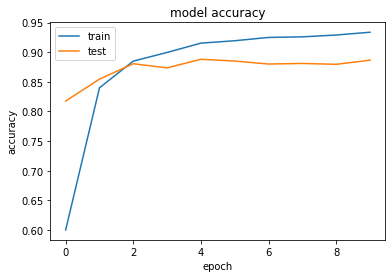

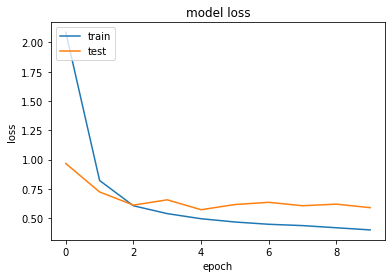

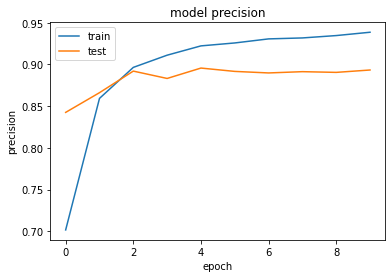

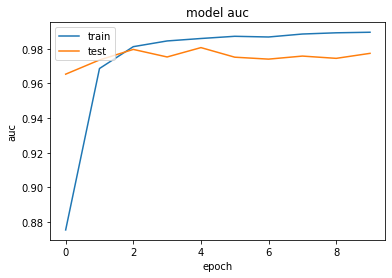

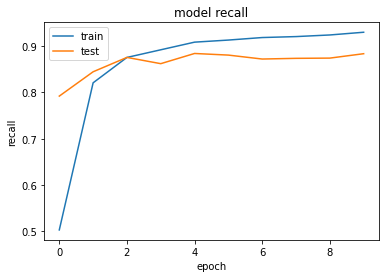

In [117]:
# plot train loss vs val loss, train auc vs val auc, 
# train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy 
# and comment your observations

# reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
import matplotlib.pyplot as plt
import numpy as np

# list all data in history
print(my_history.history.keys())
# summarize history for accuracy
plt.plot(my_history.history['Accuracy'])
plt.plot(my_history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(my_history.history['loss'])
plt.plot(my_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for precision
plt.plot(my_history.history['precision'])
plt.plot(my_history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for auc
plt.plot(my_history.history['auc'])
plt.plot(my_history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for recall
plt.plot(my_history.history['recall'])
plt.plot(my_history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


OBSERVATIONS: I see that the results are changing most rapidly within the first two epochs for each of these metrics and then the results flatten out. There is usually a single point around two epochs where each of the train and test data lines will intersect, which is interesting. 

In [110]:
#do again for tfidf
my_model = build_model(X_tfidf_train)



In [118]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)

my_history = my_model.fit(X_tfidf_train, onehot_train, epochs=10,
                          batch_size = 8, validation_data=(X_tfidf_val, onehot_val) ) 

Epoch 1/10
  26/2000 [..............................] - ETA: 8:18 - loss: 0.5260 - auc: 0.9852 - precision: 0.9388 - recall: 0.8846 - Accuracy: 0.9183

KeyboardInterrupt: 

dict_keys(['loss', 'auc', 'precision', 'recall', 'Accuracy', 'val_loss', 'val_auc', 'val_precision', 'val_recall', 'val_Accuracy'])


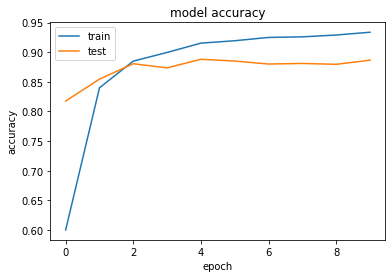

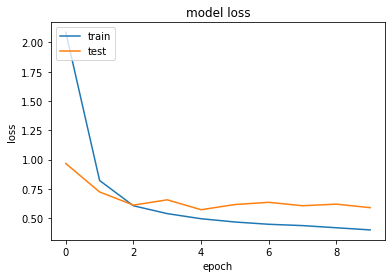

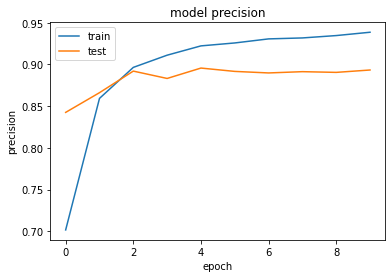

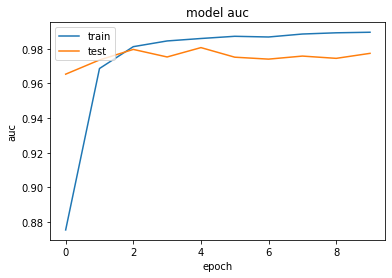

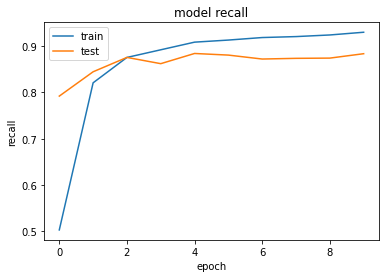

In [119]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

# plot train loss vs val loss, train auc vs val auc, 
# train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy 
# and comment your observations

# reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
import matplotlib.pyplot as plt
import numpy as np

# list all data in history
print(my_history.history.keys())
# summarize history for accuracy
plt.plot(my_history.history['Accuracy'])
plt.plot(my_history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(my_history.history['loss'])
plt.plot(my_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for precision
plt.plot(my_history.history['precision'])
plt.plot(my_history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for auc
plt.plot(my_history.history['auc'])
plt.plot(my_history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for recall
plt.plot(my_history.history['recall'])
plt.plot(my_history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

OBSERVATIONS: I notice that the metrics for TFIDF behave similarly to the metrics for the count vector.

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:** A Count Vectorizer is a tool in scikit-learn that can assist in finding the Term Frequency of words to be used in a TFIDF calculation. TFIDF requires additional calculation, specifically the Inverse Document Frequency, so it is not the same thing as Count Vectorizer. Word2Vec is a cluster of different algorithms that can be used in Natural Language Processing and can be used with either bag-of-words or skip-gram method, which we have not yet worked with in the course assignments. Glove is an unsupervised model, meaning that it does not receive target values or labels, it generates classifications on its own. 

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:** Bag of words does not take into account the relative importance of each word in the corpus because it does not evaluate how often it occurs across documents, etc. Therefore it will be less reliable in its predictions. 